In [260]:
import os
import sys
sys.path.insert(0, os.path.abspath('../utils'))
import Helpers as hp
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler import CouplingMap
from qiskit.circuit.library import UnitaryGate
from qiskit.quantum_info import Statevector # to compute state vectors
from qiskit.visualization import array_to_latex
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit_aer import AerSimulator # ideal simulator backend
from qiskit.visualization import plot_histogram  # to plot histograms of simulation results
import numpy as np
from IPython.display import display, Markdown, Latex
import sympy as sp

# Exercise 1

![Ex1](res/ex1.png)

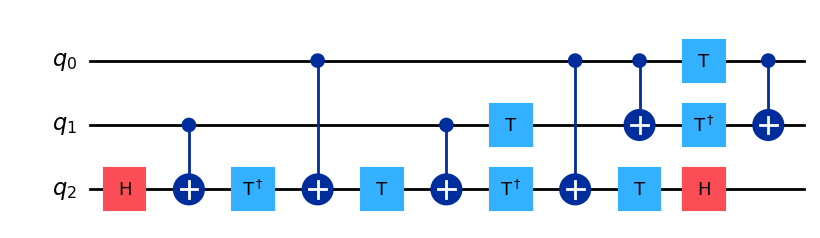

<IPython.core.display.Latex object>

In [261]:
def out_state(osv, ost):
  return "["+array_to_latex(osv).data.replace("\\begin{bmatrix}", "").replace("\\end{bmatrix}", "").replace(" & ", " ")[2:][:-7].strip()+"] = |"+ost+"\\rangle"

qc = QuantumCircuit(3)
qc.h(2)
qc.cx(1, 2)
qc.t(2).inverse()
qc.cx(0, 2)
qc.t(2)
qc.cx(1, 2)
qc.t(2).inverse()
qc.t(1)
qc.cx(0, 2)
qc.t(2)
qc.cx(0, 1)
qc.h(2)
qc.t(1).inverse()
qc.t(0)
qc.cx(0, 1)
display(qc.draw(output='mpl'))
display(Latex(rf"""
\begin{{array}}{{c c c | c}}
\textbf{{Input}} & & & \textbf{{Output State}} \\
q_2 & q_1 & q_0 & \ket{{\psi}} \\
\hline
0 & 0 & 0 & {out_state(Statevector.from_label('000').evolve(qc), "000")} \\
0 & 0 & 1 & {out_state(Statevector.from_label('001').evolve(qc), "001")} \\
0 & 1 & 0 & {out_state(Statevector.from_label('010').evolve(qc), "010")} \\
0 & 1 & 1 & {out_state(Statevector.from_label('011').evolve(qc), "111")} \\
1 & 0 & 0 & {out_state(Statevector.from_label('100').evolve(qc), "100")} \\
1 & 0 & 1 & {out_state(Statevector.from_label('101').evolve(qc), "101")} \\
1 & 1 & 0 & {out_state(Statevector.from_label('110').evolve(qc), "110")} \\
1 & 1 & 1 & {out_state(Statevector.from_label('111').evolve(qc), "011")} \\
\end{{array}}
"""))

# Exercise 2
![Ex2](res/ex2.png)

<!-- \\begin{array}{c c c | c}
    \\text{Input } \\ket{q_2 q_1 q_0} & & & & \\text{Output State} \\\\
    q_2 & q_1 & q_0 & \\ket{\\psi} \\\\
    \\hline
    0 & 0 & 0 &  \\\\
    0 & 0 & 1 &  \\\\
    0 & 1 & 0 &  \\\\
    0 & 1 & 1 &  \\\\
    1 & 0 & 0 &  \\\\
    1 & 0 & 1 &  \\\\
    1 & 1 & 0 &  \\\\
    1 & 1 & 1 &  \\\\
\\end{array} -->



<IPython.core.display.Latex object>

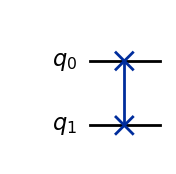

<IPython.core.display.Latex object>

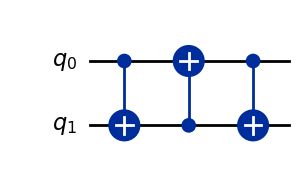

In [262]:
qc = QuantumCircuit(2)
qc.swap(0, 1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.cx(1, 0)
qc.cx(0, 1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

<IPython.core.display.Latex object>

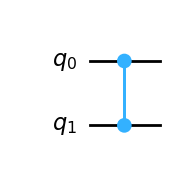

<IPython.core.display.Latex object>

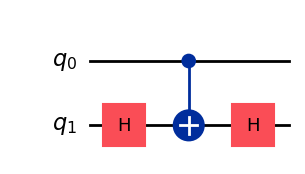

In [263]:
qc = QuantumCircuit(2)
qc.cz(0, 1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

qc = QuantumCircuit(2)
qc.h(1)
qc.cx(0, 1)
qc.h(1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

<IPython.core.display.Latex object>

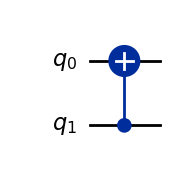

<IPython.core.display.Latex object>

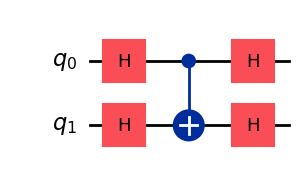

In [264]:
qc = QuantumCircuit(2)
qc.cx(1, 0)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0, 1)
qc.h(0)
qc.h(1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

<IPython.core.display.Latex object>

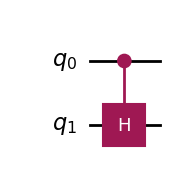

<IPython.core.display.Latex object>

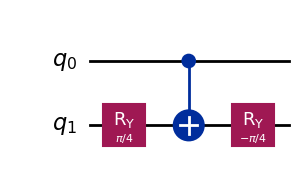

In [265]:
qc = QuantumCircuit(2)
qc.ch(0, 1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

qc = QuantumCircuit(2)
qc.ry(np.pi/4, 1)
qc.cx(0, 1)
qc.ry(-np.pi/4, 1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

<IPython.core.display.Latex object>

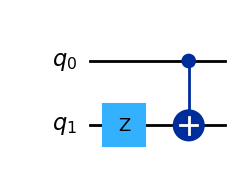

<IPython.core.display.Latex object>

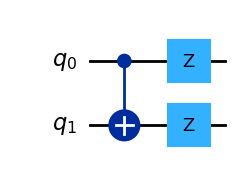

In [266]:
qc = QuantumCircuit(2)
qc.z(1)
qc.cx(0, 1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.z(0)
qc.z(1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

<IPython.core.display.Latex object>

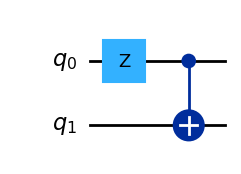

<IPython.core.display.Latex object>

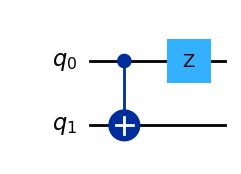

In [267]:
qc = QuantumCircuit(2)
qc.z(0)
qc.cx(0, 1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.z(0)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

<IPython.core.display.Latex object>

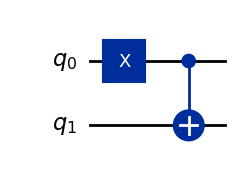

<IPython.core.display.Latex object>

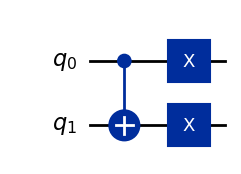

In [268]:
qc = QuantumCircuit(2)
qc.x(0)
qc.cx(0, 1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.x(0)
qc.x(1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

<IPython.core.display.Latex object>

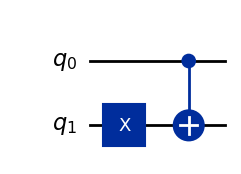

<IPython.core.display.Latex object>

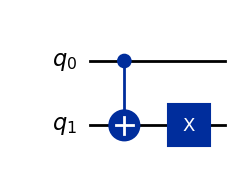

In [269]:
qc = QuantumCircuit(2)
qc.x(1)
qc.cx(0, 1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.x(1)
display(hp.derive_unitary_matrix(qc))
display(qc.draw(output='mpl'))

# Exercise 3

![Ex3a](res/ex3a.png)

### Layout

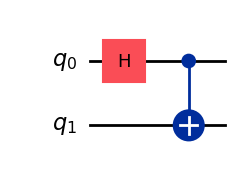

### Unitary Matrix

<IPython.core.display.Latex object>

### Input Statevector

<IPython.core.display.Latex object>

### Output Statevector

<IPython.core.display.Latex object>

In [270]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
stateVecIn=Statevector.from_label('00')
stateVecOut=stateVecIn.evolve(qc)
hp.display_info(qc,stateVecIn, "|00\\rangle", stateVecOut, "|\\Phi^{+}\\rangle = \\frac{|00\\rangle + |11\\rangle}{\\sqrt{2}}")

![Ex3b](res/ex3b.png)

In [271]:
stateVecIn=Statevector.from_label('01')
stateVecOut=stateVecIn.evolve(qc)
hp.display_io_info(stateVecIn, "|01\\rangle", stateVecOut, "|\\Phi^{-}\\rangle = \\frac{|00\\rangle - |11\\rangle}{\\sqrt{2}}")
stateVecIn=Statevector.from_label('10')
stateVecOut=stateVecIn.evolve(qc)
hp.display_io_info(stateVecIn, "|10\\rangle", stateVecOut, "|\\Psi^{+}\\rangle = \\frac{|01\\rangle + |10\\rangle}{\\sqrt{2}}")
stateVecIn=Statevector.from_label('11')
stateVecOut=stateVecIn.evolve(qc)
hp.display_io_info(stateVecIn, "|11\\rangle", stateVecOut, "-|\\Psi^{-}\\rangle = -\\frac{|01\\rangle - |10\\rangle}{\\sqrt{2}}")

### Input Statevector

<IPython.core.display.Latex object>

### Output Statevector

<IPython.core.display.Latex object>

### Input Statevector

<IPython.core.display.Latex object>

### Output Statevector

<IPython.core.display.Latex object>

### Input Statevector

<IPython.core.display.Latex object>

### Output Statevector

<IPython.core.display.Latex object>

>NOTE: Since Qiskit convention is different the result are quite different, using
><br>
>qc.h(1)
><br>
>qc.cx(1, 0)
><br>
>produce the same result as theory

![Ex3c](res/ex3c.png)

### Layout

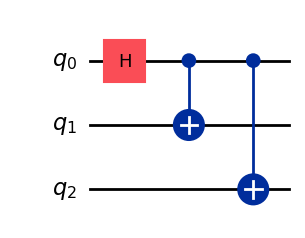

### Unitary Matrix

<IPython.core.display.Latex object>

### Input Statevector

<IPython.core.display.Latex object>

### Output Statevector

<IPython.core.display.Latex object>

In [272]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
stateVecIn=Statevector.from_label('000')
stateVecOut=stateVecIn.evolve(qc)
hp.display_info(qc,stateVecIn, "|000\\rangle", stateVecOut, "\\frac{|000\\rangle + |111\\rangle}{\\sqrt{2}}")

![Ex3d](res/ex3d.png)

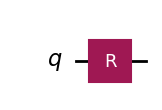

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [273]:
qc = QuantumCircuit(1)
rU = np.array([[1/np.sqrt(3), -np.sqrt(2/3)], [np.sqrt(2/3), 1/np.sqrt(3)]])
custom_gate = UnitaryGate(rU, label="R")
qc.append(custom_gate, [0])
display(qc.draw(output='mpl'))
display(hp.derive_unitary_matrix(qc))
qc = QuantumCircuit(1)
qc.ry(2*np.arccos(1/np.sqrt(3)), 0)
display(hp.derive_unitary_matrix(qc))


### Layout

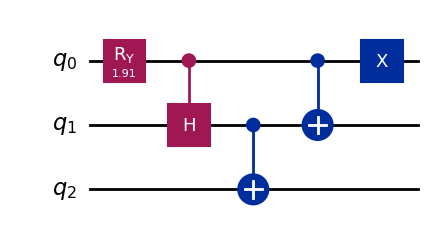

### Unitary Matrix

<IPython.core.display.Latex object>

### Input Statevector

<IPython.core.display.Latex object>

### Output Statevector

<IPython.core.display.Latex object>

In [274]:
qc = QuantumCircuit(3)
qc.ry(2*np.arccos(1/np.sqrt(3)), 0)
qc.ch(0, 1)
qc.cx(1, 2)
qc.cx(0, 1)
qc.x(0)
stateVecIn=Statevector.from_label('000')
stateVecOut=stateVecIn.evolve(qc)
hp.display_info(qc,stateVecIn, "|000\\rangle", stateVecOut, "\\frac{|001\\rangle + |010\\rangle + |100\\rangle}{\\sqrt{3}}")

# Exercise 4
![Ex4](res/ex4a.png)

$$
R_z(\Phi)R_x(\Theta)|0\rangle 
= 
\begin{bmatrix}
e^{-j\Phi/2} & 0\\
0 & e^{j\Phi/2}
\end{bmatrix}
\begin{bmatrix}
cos(\Theta/2) & -jsin(\Theta/2)\\
-jsin(\Theta/2) & cos(\Theta/2)
\end{bmatrix}
\begin{bmatrix}
1\\
0
\end{bmatrix} \\[8pt]
=
\begin{bmatrix}
e^{-j\Phi/2} & 0\\
0 & e^{j\Phi/2}
\end{bmatrix}
\begin{bmatrix}
cos(\Theta/2)\\
-jsin(\Theta/2)
\end{bmatrix}
=
\begin{bmatrix}
cos(\Theta/2) e^{-j\Phi/2} \\
-jsin(\Theta/2) e^{j\Phi/2}
\end{bmatrix}
=
e^{-j\Phi/2}
\begin{bmatrix}
cos(\Theta/2) \\
-jsin(\Theta/2) e^{j\Phi}
\end{bmatrix}
=
e^{-j\Phi/2}[cos(\Theta/2) |0 \rangle -jsin(\Theta/2) e^{j\Phi} |1 \rangle]
$$

### Layout

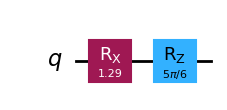

### Unitary Matrix

<IPython.core.display.Latex object>

### Input Statevector

<IPython.core.display.Latex object>

### Output Statevector with global phase

<IPython.core.display.Latex object>

### Output Statevector without global phase

<IPython.core.display.Latex object>

In [275]:
qc = QuantumCircuit(1)
qc.rx(2*np.arccos(0.8),0)
qc.rz(5*np.pi/6,0)
hp.display_structure(qc)
stateVecIn = Statevector.from_label('0')
hp.display_state_vector("Input Statevector", stateVecIn, "|0 \\rangle")
stateVecOut = stateVecIn.evolve(qc)
hp.display_state_vector("Output Statevector with global phase", stateVecOut, "[0.8 e^{-\\displaystyle\\frac{5\\Pi}{12}}, 0.6 e^{-\\displaystyle\\frac{\\Pi}{12}}]")

global_phase = np.angle(stateVecOut.data[0])
stateVecOut_no_global_phase = stateVecOut / np.exp(1j * global_phase)  # === stateVecOut * np.exp(-1j * global_phase)
hp.display_state_vector("Output Statevector without global phase", stateVecOut_no_global_phase, "[0.8, 0.6 e^{\\displaystyle\\frac{\\Pi}{3}} ]")


![Ex4a](res/ex4b.png)

### Layout

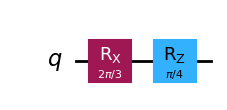

### Unitary Matrix

<IPython.core.display.Latex object>

### Input Statevector

<IPython.core.display.Latex object>

### Output Statevector with global phase

<IPython.core.display.Latex object>

### Output Statevector without global phase

<IPython.core.display.Latex object>

In [276]:
qc = QuantumCircuit(1)
# qc.rx(2*np.arcsin(np.sqrt(2*(np.sqrt(3)/(2*np.sqrt(2))) ** 2)),0)
# qc.rz(np.arctan2(1, 1),0)

qc.rx(2*np.arccos(1/2),0)
qc.rz(np.pi/4,0)
hp.display_structure(qc)
stateVecIn = Statevector.from_label('0')
hp.display_state_vector("Input Statevector", stateVecIn, "|0 \\rangle")
stateVecOut = stateVecIn.evolve(qc)
hp.display_state_vector("Output Statevector with global phase", stateVecOut, "[\\frac{1}{2}e^{\\displaystyle\\frac{\\Pi}{8}}, 0.866 e^{\\displaystyle\\frac{3\\Pi}{8}}]")

global_phase = np.angle(stateVecOut.data[0])
stateVecOut_no_global_phase = stateVecOut / np.exp(1j * global_phase)  # === stateVecOut * np.exp(-1j * global_phase)
hp.display_state_vector("Output Statevector without global phase", stateVecOut_no_global_phase, "[\\frac{1}{2}, (\\displaystyle\\frac{\\sqrt{3}}{2\\sqrt{2}} + \\displaystyle\\frac{\\sqrt{3}}{2\\sqrt{2}}j)]")

>NOTE: The initial j phase is removed dividing for the global phase

# Exercise 5
![Ex5](res/ex5.png)

c:\Users\admin\anaconda3\Lib\site-packages\qiskit_aer\noise\noise_model.py:377: UserWarning: Qiskit backend <qiskit.providers.fake_provider.generic_backend_v2.GenericBackendV2 object at 0x00000216F17F2CD0> has no QubitProperties, so the resulting noise model will not include any thermal relaxation errors.
  warn(


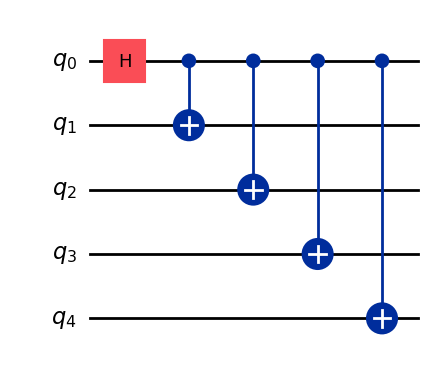

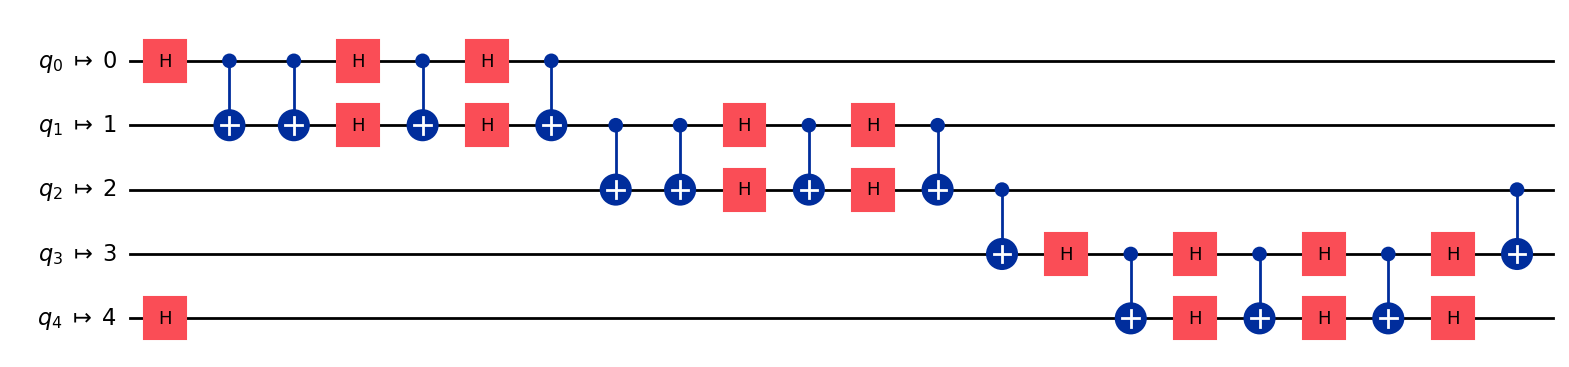

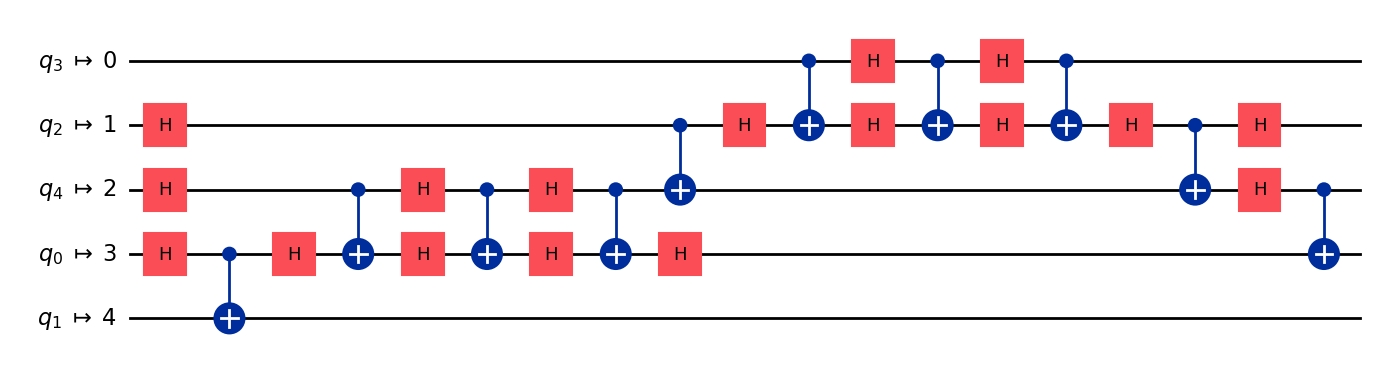

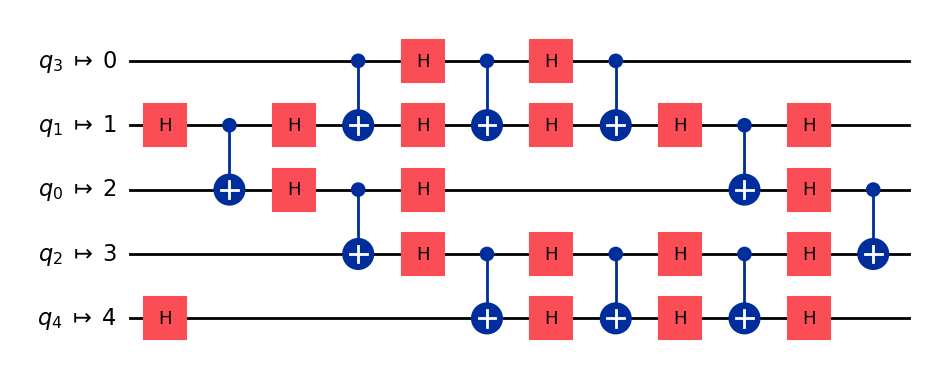

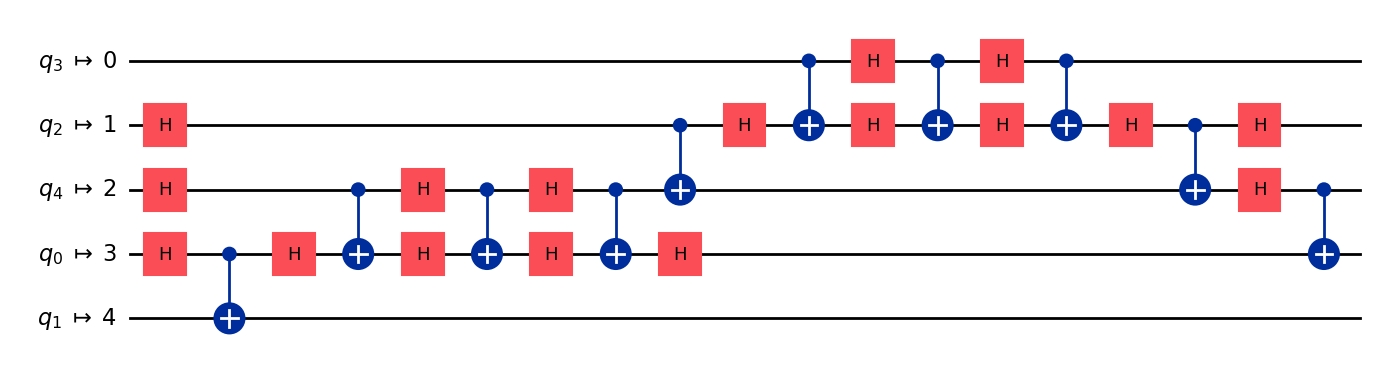

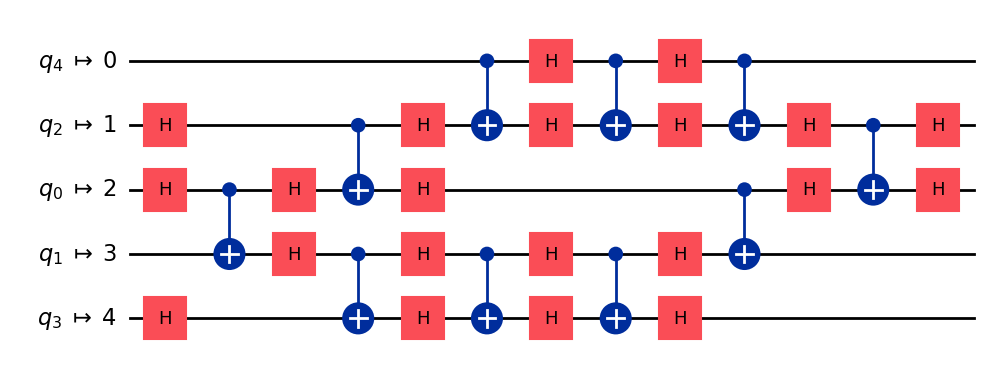

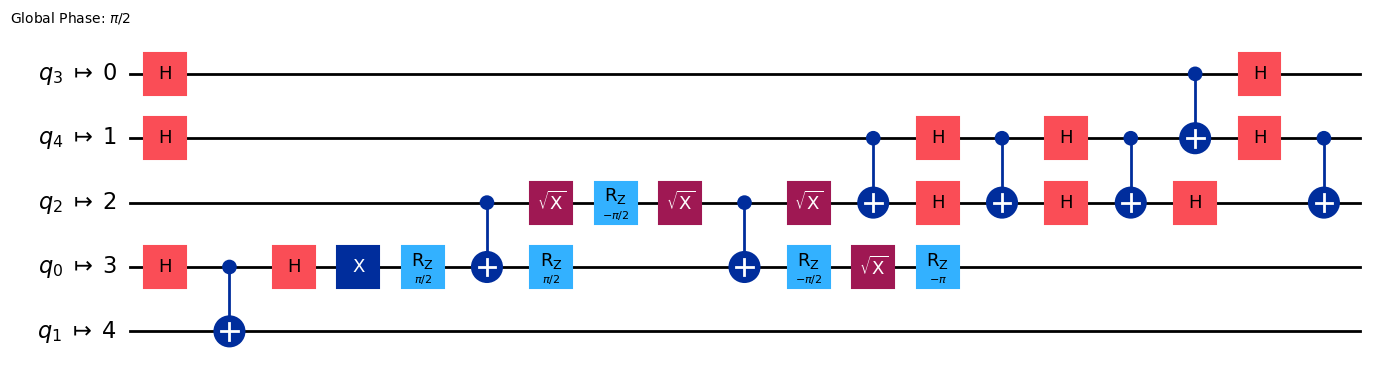

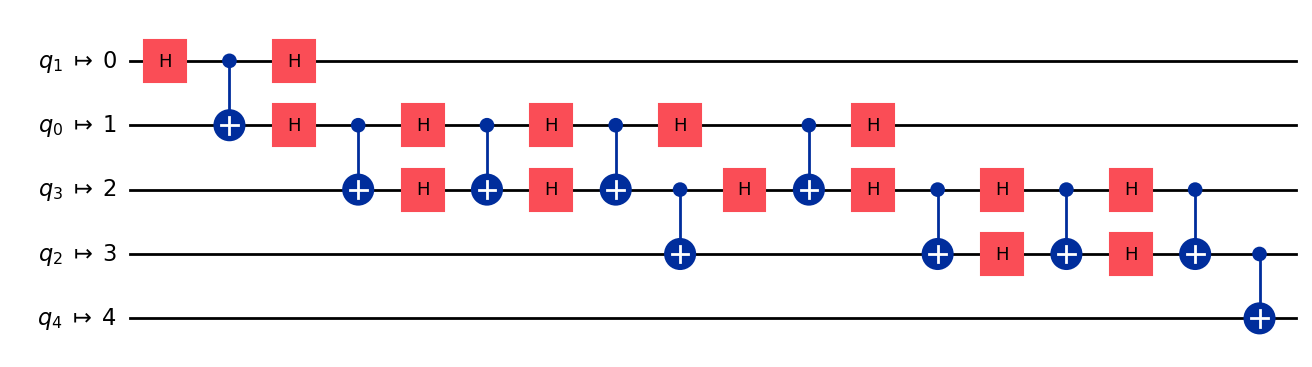

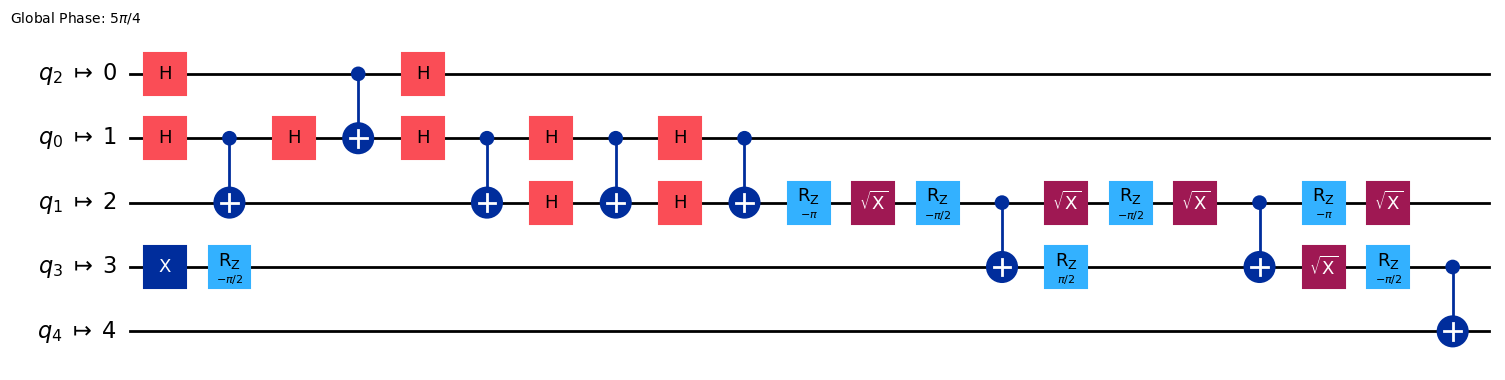

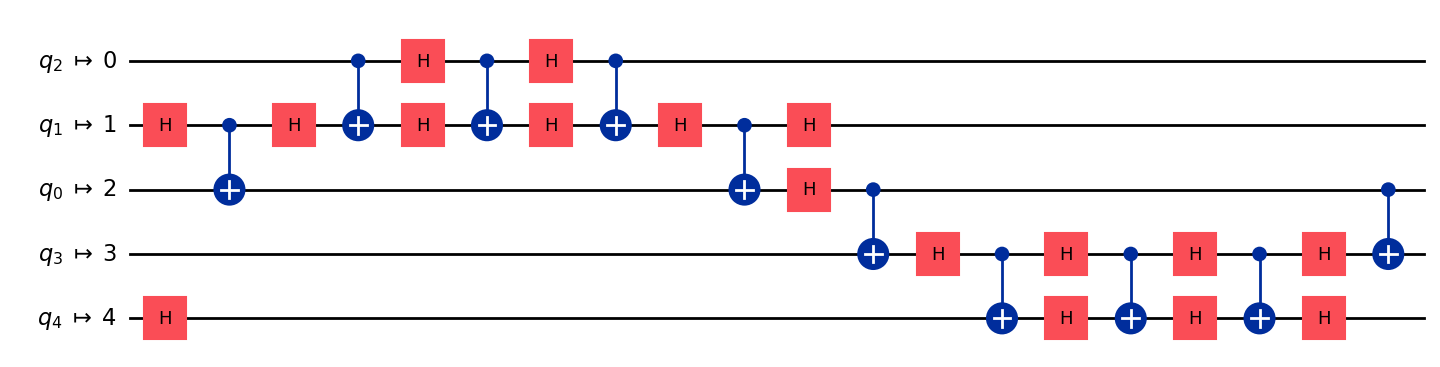

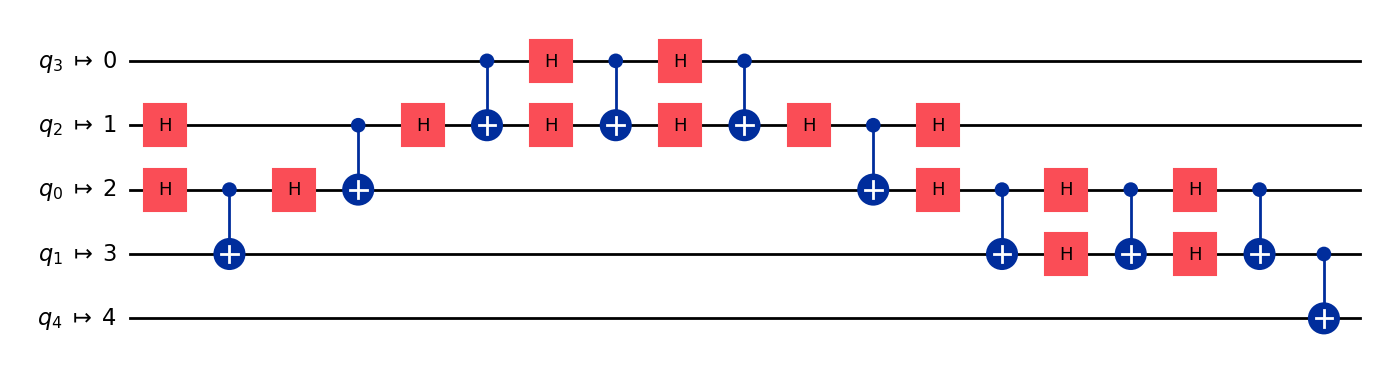

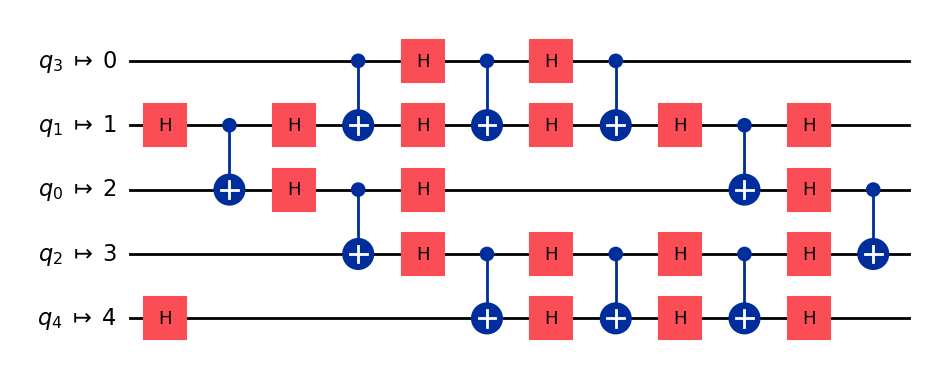

In [290]:
architecture=CouplingMap([[0,1],[1,2],[2,3],[3,4]])
gatesQcomp=["id","rz","sx","x","cx", "h"]
nQubit = 5
customQcomputer = GenericBackendV2 ( nQubit , gatesQcomp ,
coupling_map = architecture , noise_info = False )
ourSim = AerSimulator.from_backend (customQcomputer)
circ = QuantumCircuit (5)
circ.h (0)
circ.cx(0, 1)
circ.cx(0, 2)
circ.cx(0, 3)
circ.cx(0, 4)
display(circ.draw(output='mpl'))
transpiledCird = transpile(circ , ourSim , optimization_level= 0)
display(transpiledCird.draw(output='mpl'))
for i in range(10):
    transpiledCird = transpile(circ , ourSim , optimization_level= 3)
    display(transpiledCird.draw(output='mpl'))

c:\Users\admin\anaconda3\Lib\site-packages\qiskit_aer\noise\noise_model.py:377: UserWarning: Qiskit backend <qiskit.providers.fake_provider.generic_backend_v2.GenericBackendV2 object at 0x00000216B813AB50> has no QubitProperties, so the resulting noise model will not include any thermal relaxation errors.
  warn(


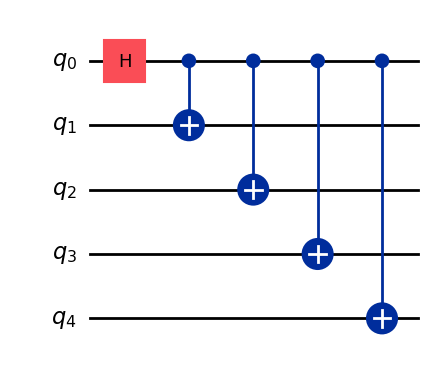

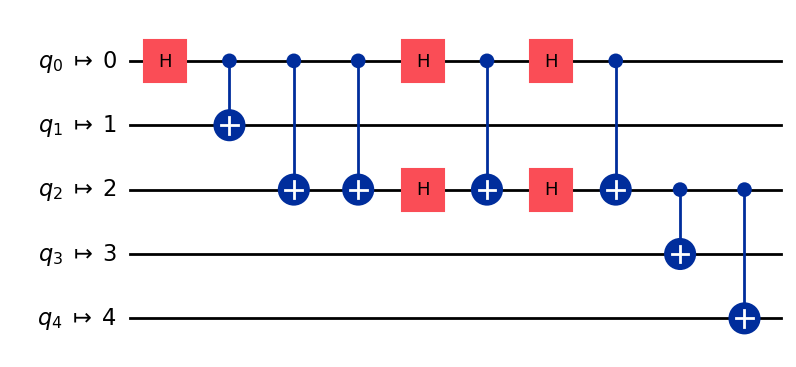

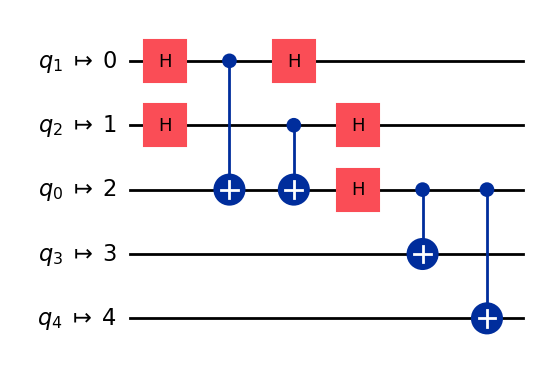

In [281]:
architecture=CouplingMap([[0,1],[1,2],[2,3],[3,4],[0,2],[2,4]])
gatesQcomp=["id","rz","sx","x","cx", "h"]
nQubit = 5
customQcomputer = GenericBackendV2 ( nQubit , gatesQcomp ,
coupling_map = architecture , noise_info = False )
ourSim = AerSimulator.from_backend (customQcomputer)
circ = QuantumCircuit (5)
circ.h (0)
circ.cx(0, 1)
circ.cx(0, 2)
circ.cx(0, 3)
circ.cx(0, 4)
display(circ.draw(output='mpl'))
transpiledCird = transpile(circ , ourSim , optimization_level= 0)
display(transpiledCird.draw(output='mpl'))
transpiledCird = transpile(circ , ourSim , optimization_level= 3)
display(transpiledCird.draw(output='mpl'))

c:\Users\admin\anaconda3\Lib\site-packages\qiskit_aer\noise\noise_model.py:377: UserWarning: Qiskit backend <qiskit.providers.fake_provider.generic_backend_v2.GenericBackendV2 object at 0x00000216F41A0810> has no QubitProperties, so the resulting noise model will not include any thermal relaxation errors.
  warn(


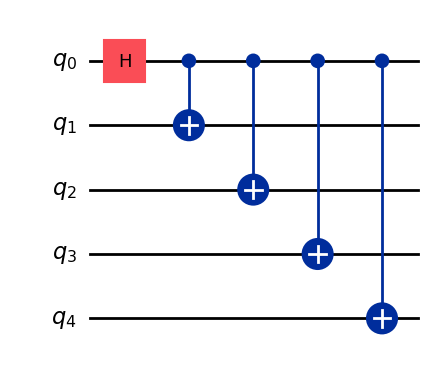

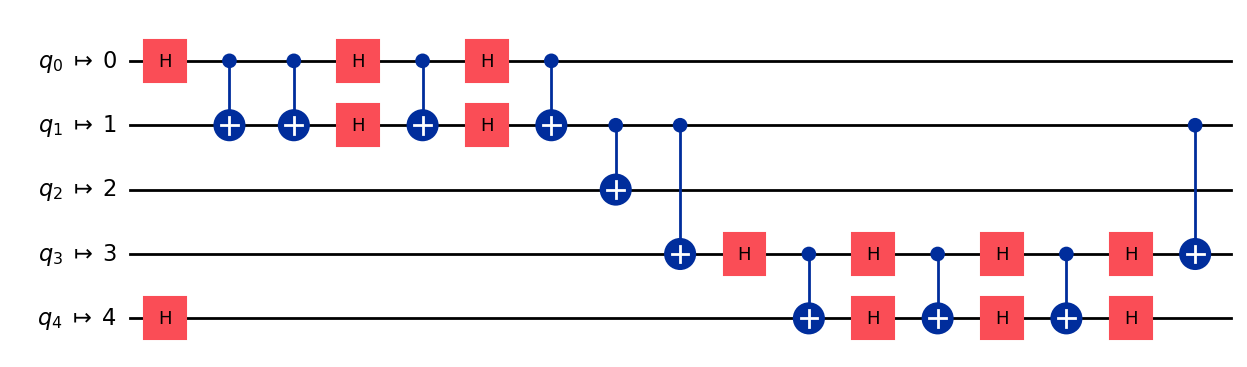

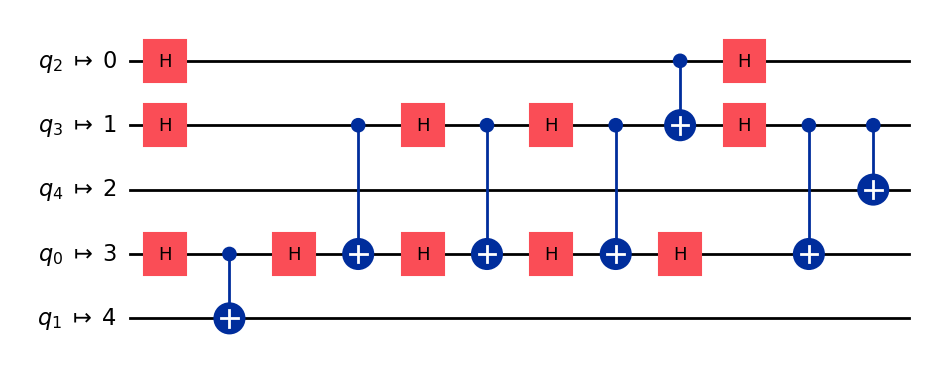

In [282]:
architecture=CouplingMap([[0,1],[1,2],[1,3],[3,4]])
gatesQcomp=["id","rz","sx","x","cx", "h"]
nQubit = 5
customQcomputer = GenericBackendV2 ( nQubit , gatesQcomp ,
coupling_map = architecture , noise_info = False )
ourSim = AerSimulator.from_backend (customQcomputer)
circ = QuantumCircuit (5)
circ.h (0)
circ.cx(0, 1)
circ.cx(0, 2)
circ.cx(0, 3)
circ.cx(0, 4)
display(circ.draw(output='mpl'))
transpiledCird = transpile(circ , ourSim , optimization_level= 0)
display(transpiledCird.draw(output='mpl'))
transpiledCird = transpile(circ , ourSim , optimization_level= 3)
display(transpiledCird.draw(output='mpl'))